### Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
import itertools

### Preparation

In [ ]:
data = pd.read_csv('/dataset_lies.csv')

In [ ]:
data.head()

AudioID  UserID     Sex  Age Reliability  SpeechType  Длина записи  \
0        1       1  female   18       Truth    Prepared        106.00   
1        2       1  female   18       Truth  Unprepared         15.00   
2        3       1  female   18         Lie    Prepared         32.40   
3        4       1  female   18         Lie  Unprepared          9.00   
4        5       2  female   18       Truth    Prepared         72.26   

   Кол-во деталей  Модальность "логичность"  Кол-во речевых ошибок и оговорок  \
0              11                         1                                 5   
1               4                         1                                 0   
2               2                         2                                 0   
3               1                         0                                 0   
4               9                         5                                 2   

   ...  Сокрытие ладоней  Медленное потирание ладоней одна о другую  \
0  ...                 0                                          0   
1  ...                 0                                          1   
2  ...                 0                                          1   
3  ...                 0                                          1   
4  ...                 0                                          0   

   Жесты-иллюстрации  Жесты-манипуляции  \
0                  3                 18   
1                  2                  5   
2                  0                  2   
3                  0                  1   
4                  2                  9   

   Использование открытых рук ладонями вверх в сочетании с приподнятыми плечами и локтями. плотно прижатыми к телу  \
0                                                  0                                                                 
1                                                  0                                                                 
2                                                  0                                                                 
3                                                  0                                                                 
4                                                  0                                                                 

   Нервное покачивание ногой  Плотное сжатие губ  \
0                          0                   0   
1                          0                   0   
2                          0                   0   
3                          0                   0   
4                          0                   0   

   Почти полное отсутствие улыбки или натянутая. формальная улыбка. при которой не видно зубов  \
0                                                  0                                             
1                                                  0                                             
2                                                  0                                             
3                                                  0                                             
4                                                  0                                             

   Улыбка без моргания  Движение лицевых мышц в области рта и носа  
0                    0                                           0  
1                    0                                           0  
2                    0                                           0  
3                    0                                           1  
4                    0                                           0  

[5 rows x 39 columns]

In [ ]:
data.Sex = data.Sex.map({'female': 0, 'male': 1})
data.Reliability = data.Reliability.map({'Truth': 0, 'Lie': 1})
data = data.drop(['AudioID', 'UserID'], axis=1)

In [ ]:
data.Sex = data.Sex.fillna(1)

In [ ]:
data_prep = data[data['SpeechType'] == 'Prepared'].drop('SpeechType', axis=1)

In [ ]:
data_unprep = data[data['SpeechType'] == 'Unprepared'].drop('SpeechType', axis=1)

In [ ]:
data_prep.head()

Sex  Age  Reliability  Длина записи  Кол-во деталей  \
0  0.0   18            0        106.00              11   
2  0.0   18            1         32.40               2   
4  0.0   18            0         72.26               9   
6  0.0   18            1         78.23               6   
8  1.0   19            0        169.13              12   

   Модальность "логичность"  Кол-во речевых ошибок и оговорок  \
0                         1                                 5   
2                         2                                 0   
4                         5                                 2   
6                         1                                 3   
8                         3                                 5   

   Лексика. описывающая динамику  Дословные повторы  \
0                             17                  3   
2                              2                  4   
4                              7                  5   
6                              7                  1   
8                             15                  6   

   Вводные и незнаменательные слова  ...  Сокрытие ладоней  \
0                                 0  ...                 0   
2                                 0  ...                 0   
4                                 1  ...                 0   
6                                 0  ...                 0   
8                                 2  ...                 0   

   Медленное потирание ладоней одна о другую  Жесты-иллюстрации  \
0                                          0                  3   
2                                          1                  0   
4                                          0                  2   
6                                          0                  6   
8                                          1                 14   

   Жесты-манипуляции  \
0                 18   
2                  2   
4                  9   
6                 15   
8                 15   

   Использование открытых рук ладонями вверх в сочетании с приподнятыми плечами и локтями. плотно прижатыми к телу  \
0                                                  0                                                                 
2                                                  0                                                                 
4                                                  0                                                                 
6                                                  1                                                                 
8                                                  0                                                                 

   Нервное покачивание ногой  Плотное сжатие губ  \
0                          0                   0   
2                          0                   0   
4                          0                   0   
6                          0                   0   
8                          0                   0   

   Почти полное отсутствие улыбки или натянутая. формальная улыбка. при которой не видно зубов  \
0                                                  0                                             
2                                                  0                                             
4                                                  0                                             
6                                                  0                                             
8                                                  0                                             

   Улыбка без моргания  Движение лицевых мышц в области рта и носа  
0                    0                                           0  
2                    0                                           0  
4                    0                                           0  
6                    0                                           0  
8                    0                                 

In [ ]:
data_prep.drop(['Длина записи'], axis=1, inplace=True)

In [ ]:
data_unprep.drop(['Длина записи'], axis=1, inplace=True)

In [ ]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 78
Data columns (total 35 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Sex                                                                                                              40 non-null     float64
 1   Age                                                                                                              40 non-null     int64  
 2   Reliability                                                                                                      40 non-null     int64  
 3   Кол-во деталей                                                                                                   40 non-null     int64  
 4   Модальность "логичность"                     

In [ ]:
y_prep = data_prep['Reliability']
X_prep = data_prep.drop('Reliability', axis=1)

In [ ]:
y_unprep = data_unprep['Reliability']
X_unprep = data_unprep.drop('Reliability', axis=1)

In [ ]:
data_prep['Age'].value_counts().sort_index()

Age
18    4
19    4
21    4
22    2
23    2
26    4
28    4
41    2
46    2
47    2
49    2
58    4
60    2
75    2
Name: count, dtype: int64

### Оценка уровня нормальности

#### Подготовленная речь

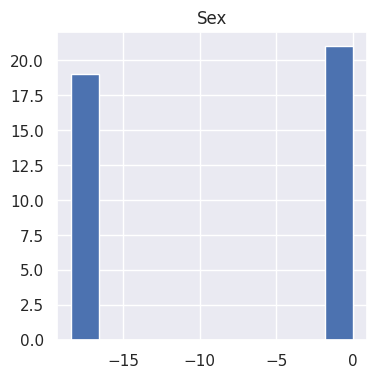

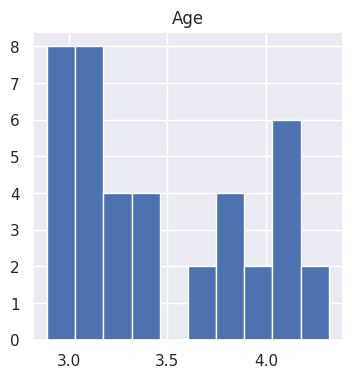

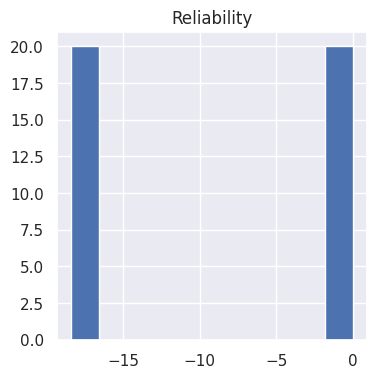

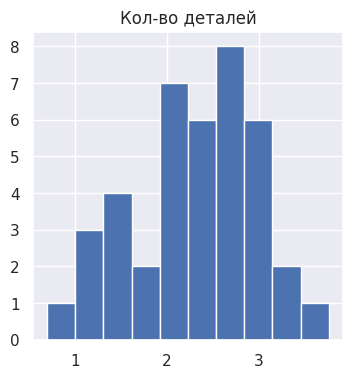

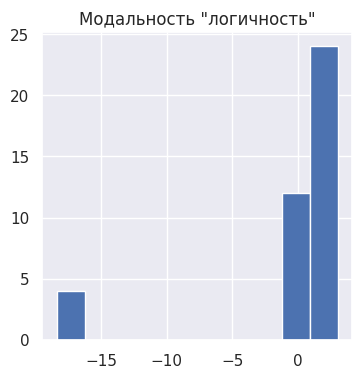

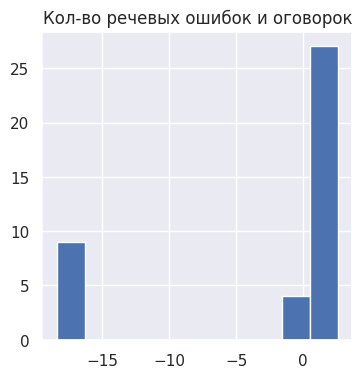

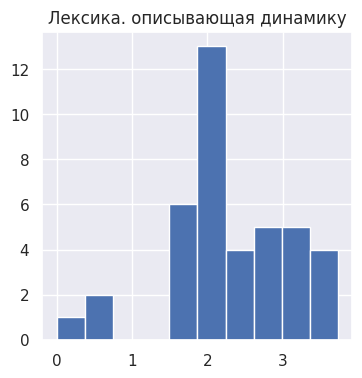

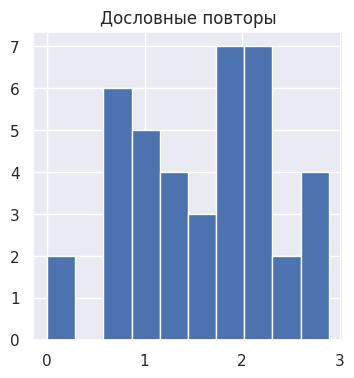

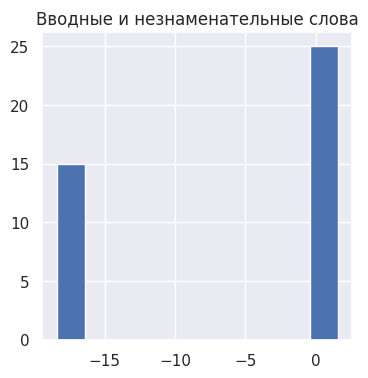

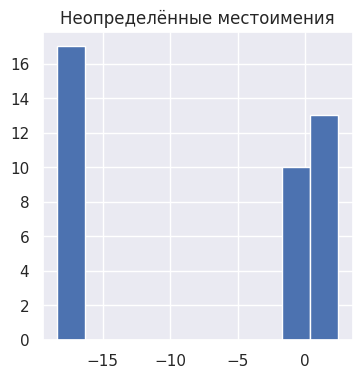

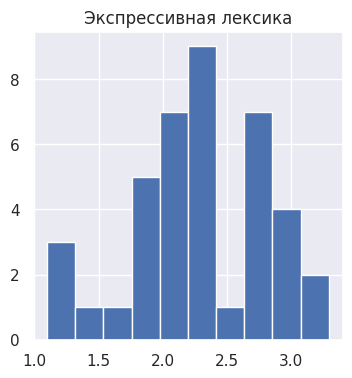

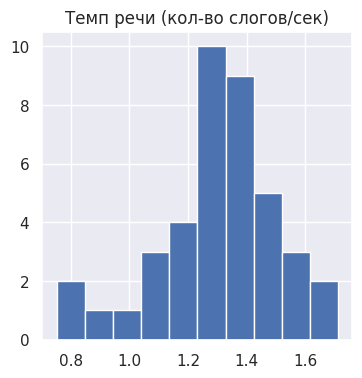

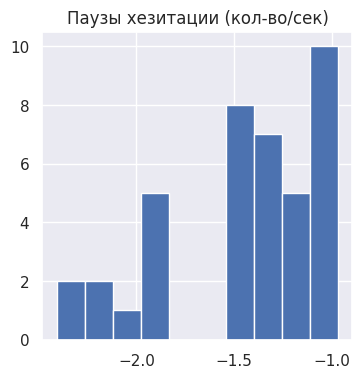

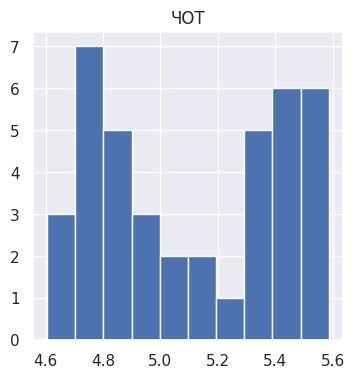

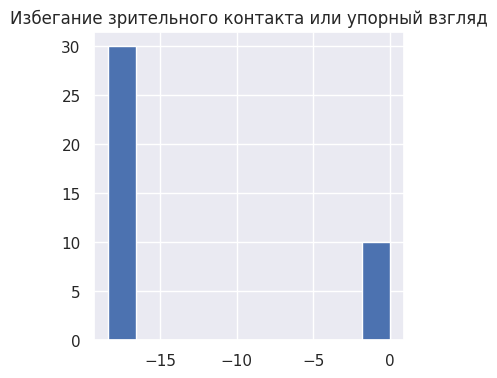

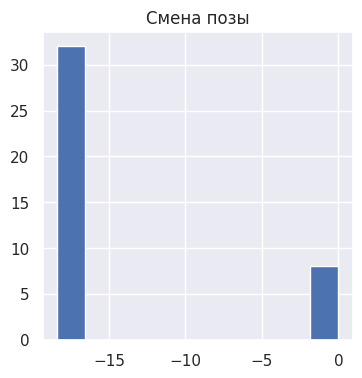

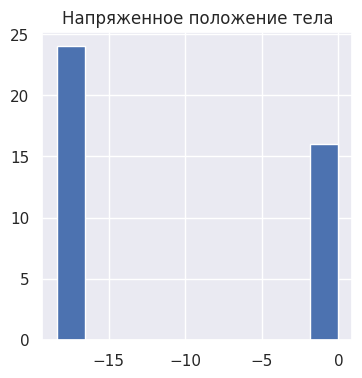

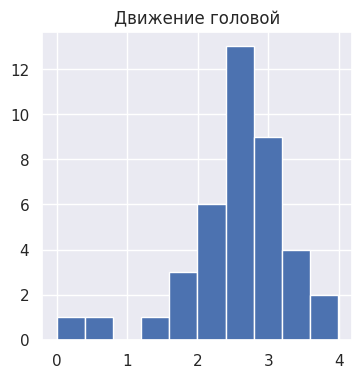

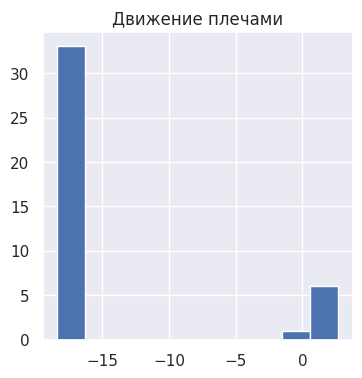

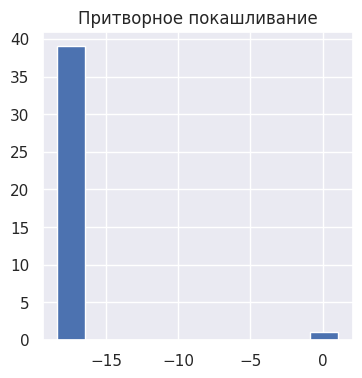

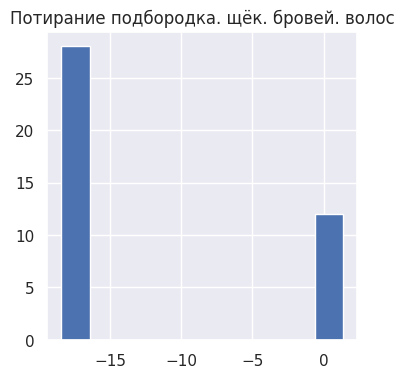

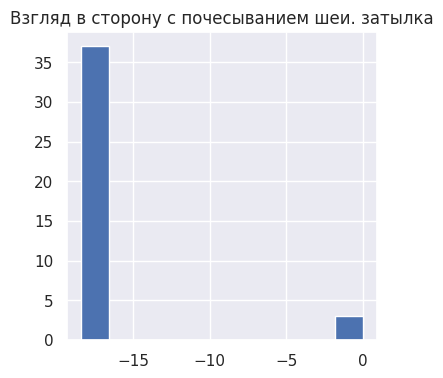

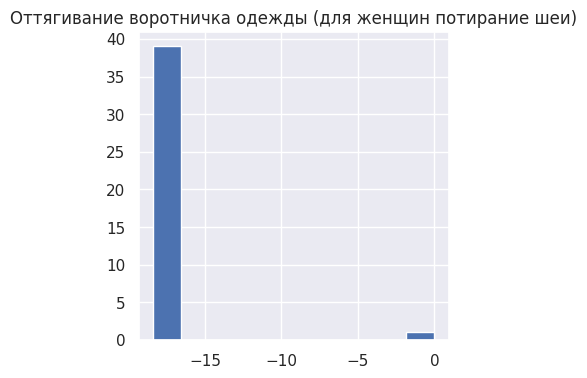

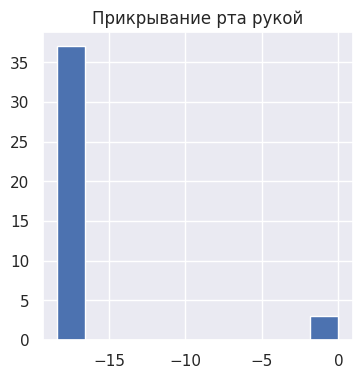

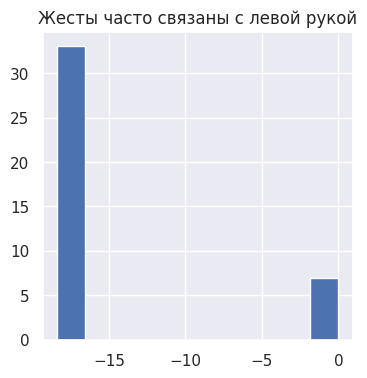

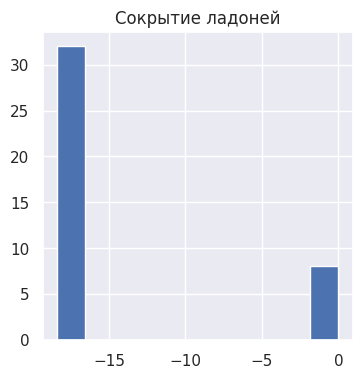

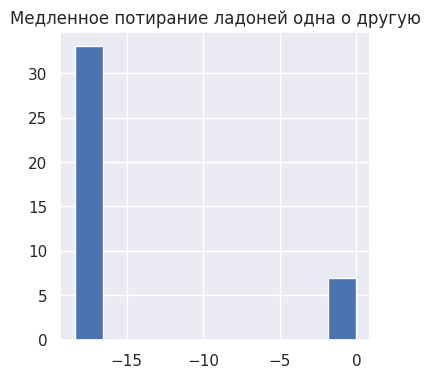

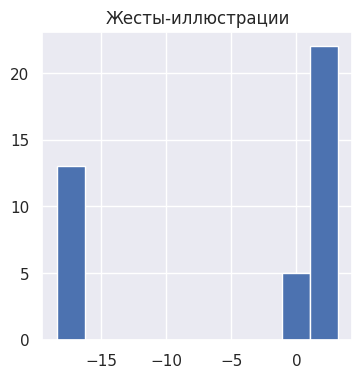

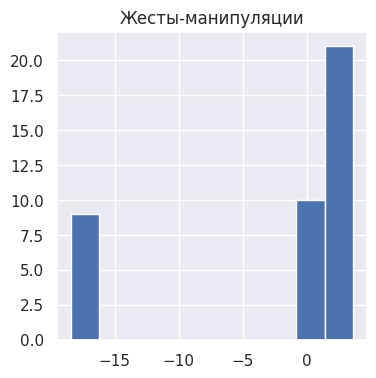

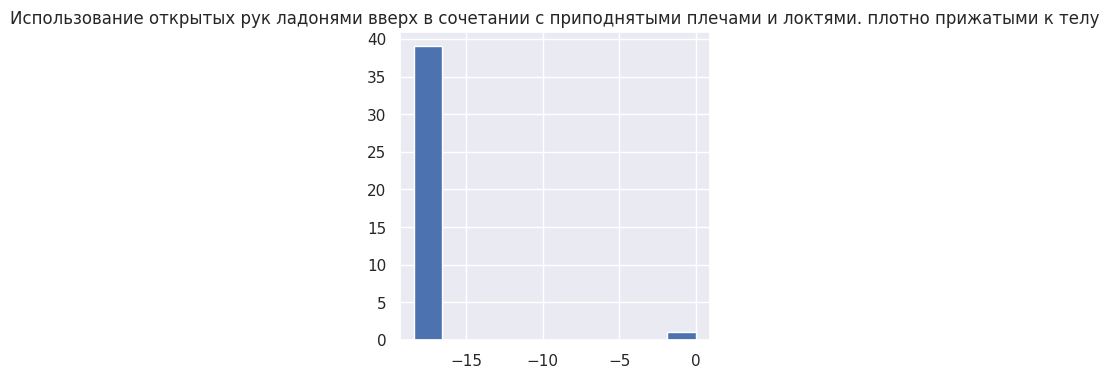

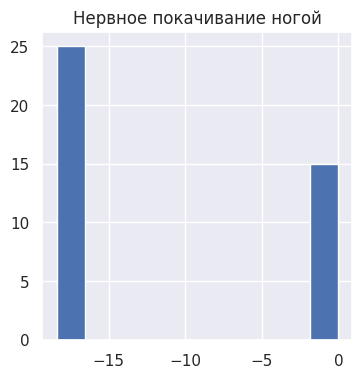

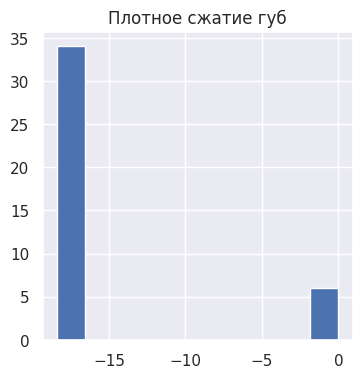

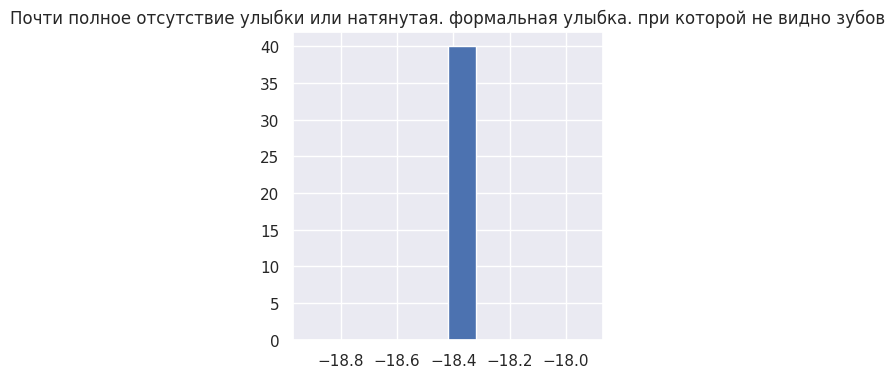

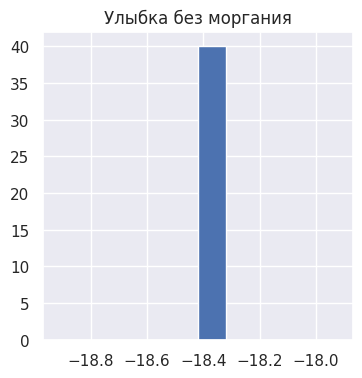

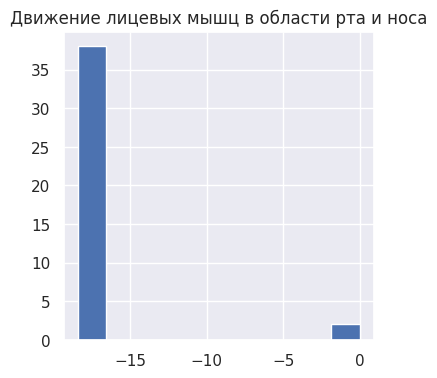

In [ ]:
import matplotlib.pyplot as plt


for column in data_prep.columns:
    plt.figure()
    np.log(data_prep[column] + 1e-8).hist()
    plt.title(column)
    plt.show()



Движение плечами - практически равномерное.  
Притворное покашливание - практически равномерное.  
Взгляд в сторону с почесыванием шеи/затылка - практически равномерное.  
Оттягивание воротничка - практически равномерное.  
Прикрывание рта рукой - практически равномерное.  
Использование открытых рук ладонями вверх - практически равномерное.  
Отсутствие улыбки/натянутая улыбка - равномерное.  
Улыбка без моргания - равномерное.  
Движение лицевых мышц в области рта и носа - равномерное.  



Логарифм движений головой - почти нормальное.  
Темп речи и паузы хезитации - нормальное.  


#### **Неподготовленная речь**

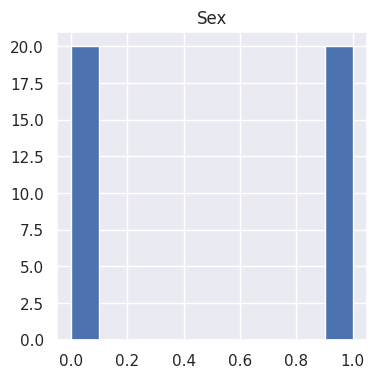

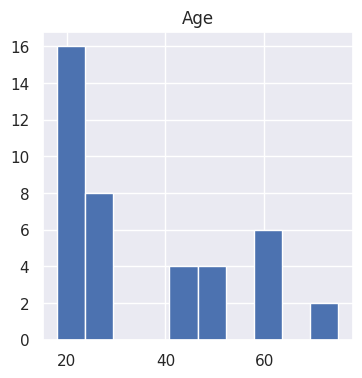

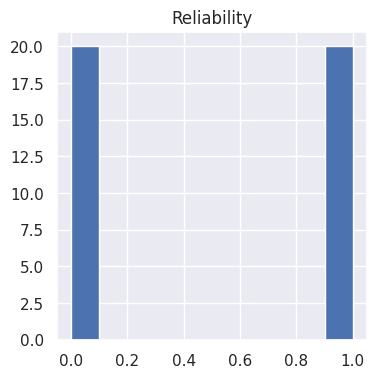

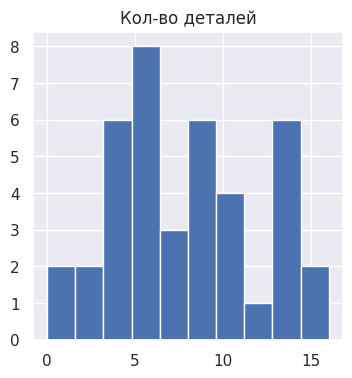

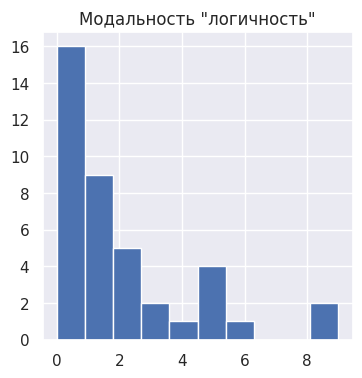

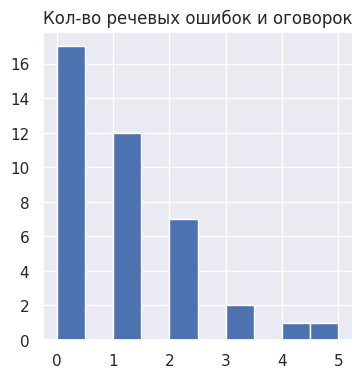

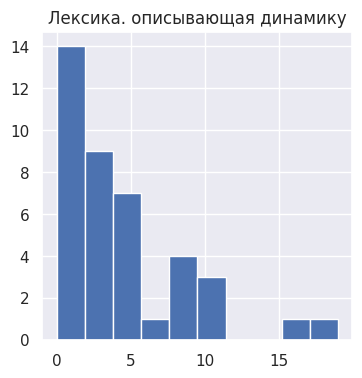

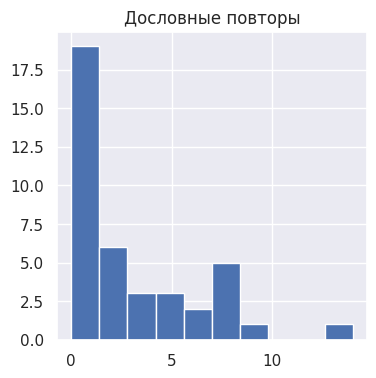

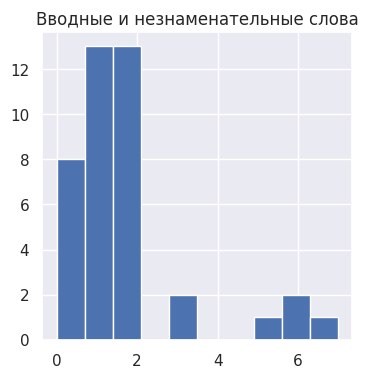

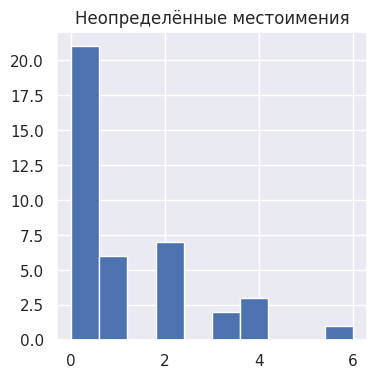

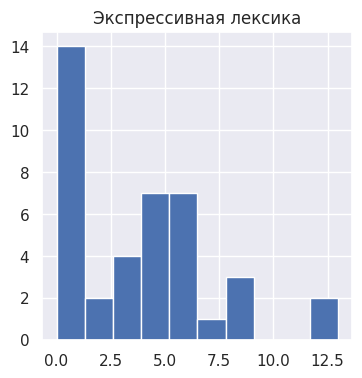

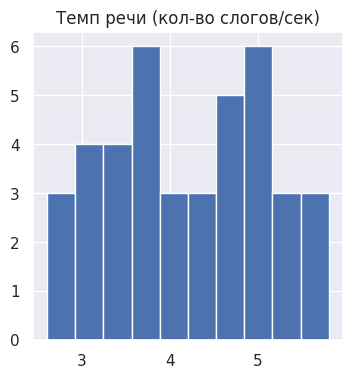

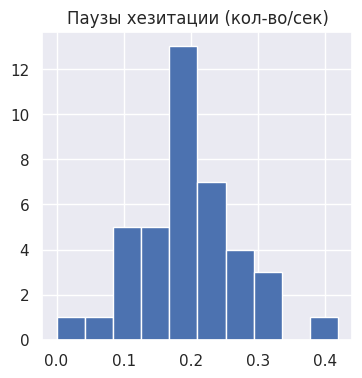

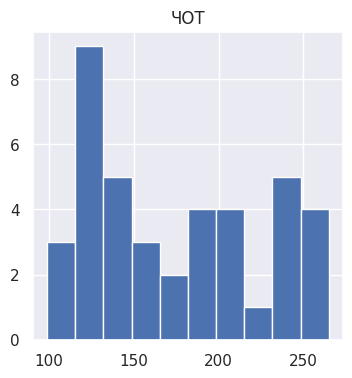

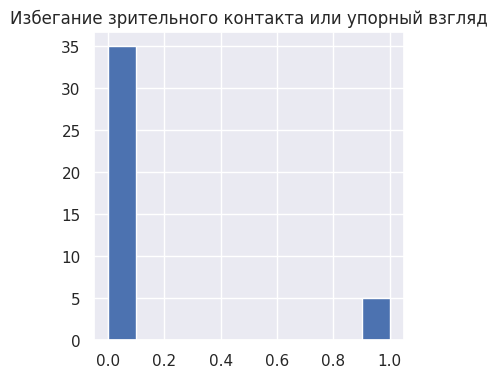

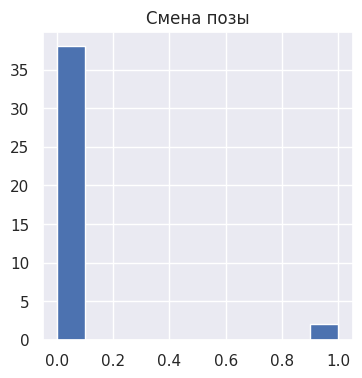

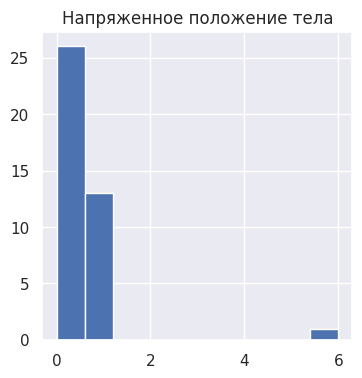

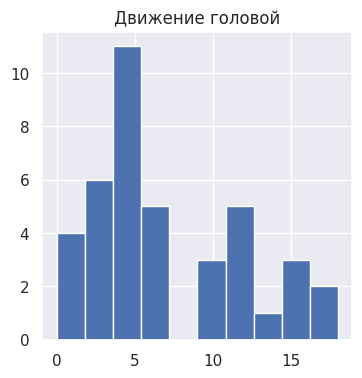

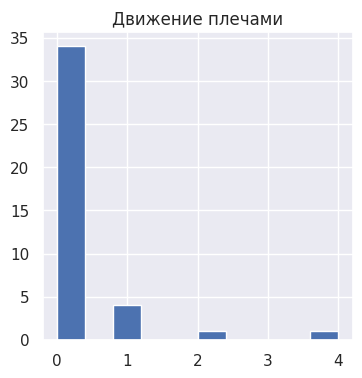

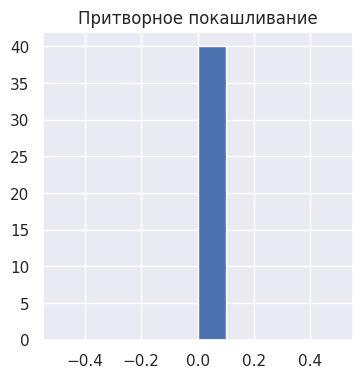

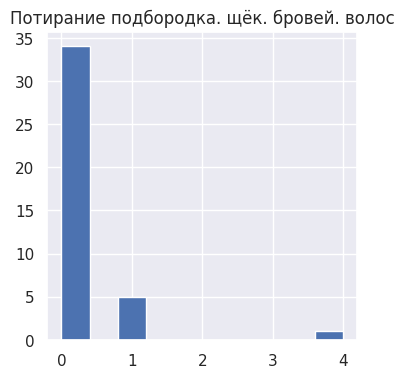

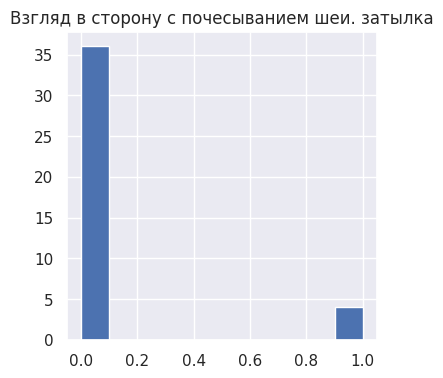

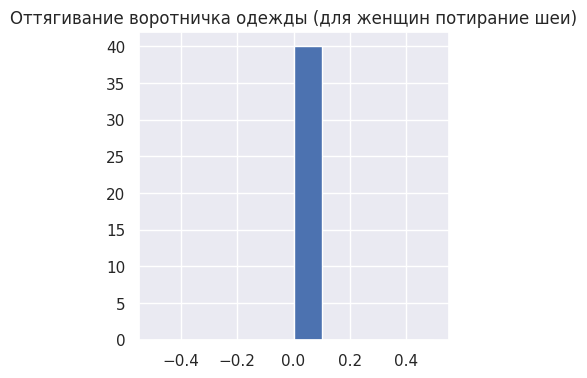

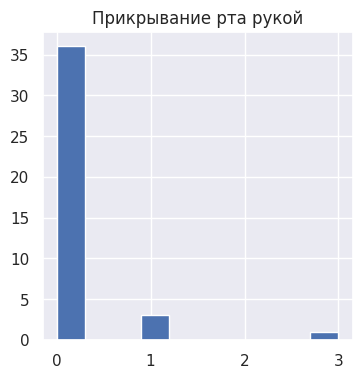

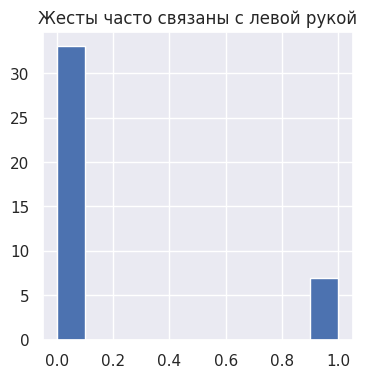

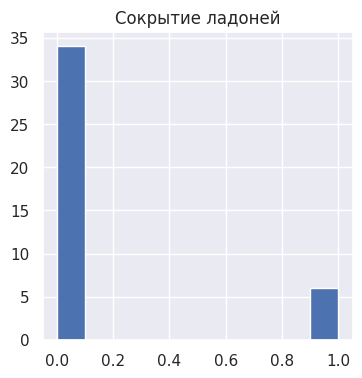

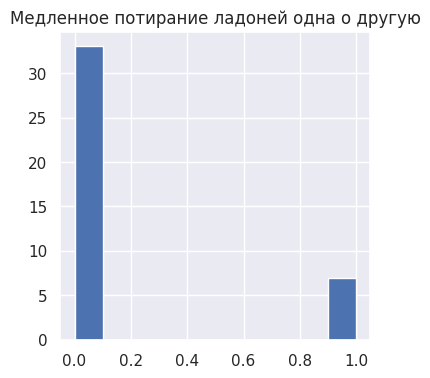

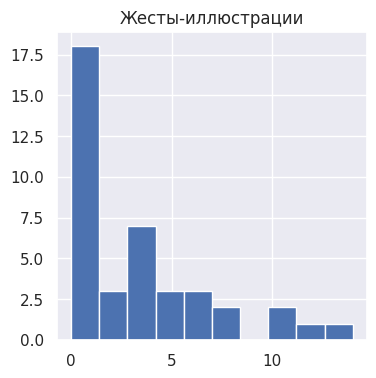

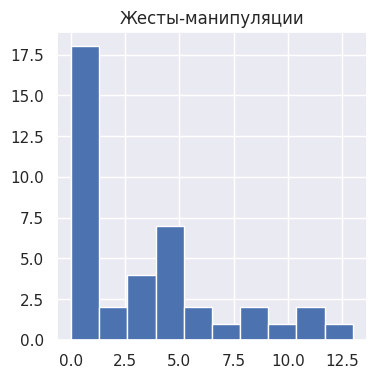

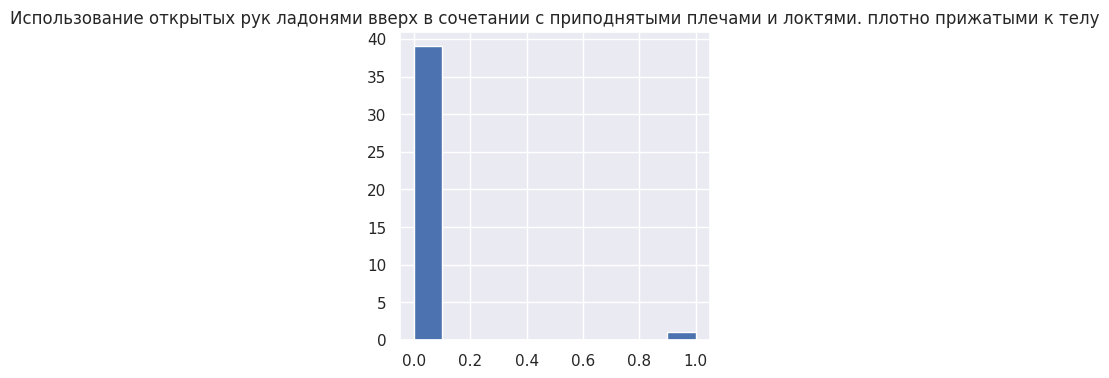

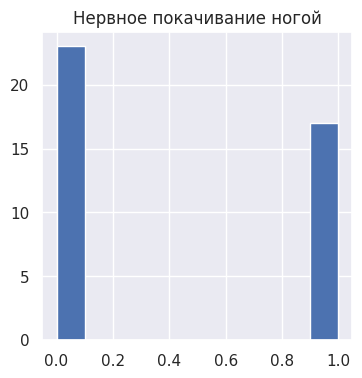

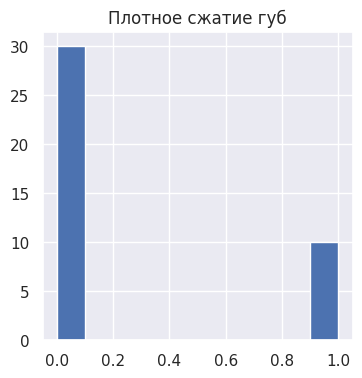

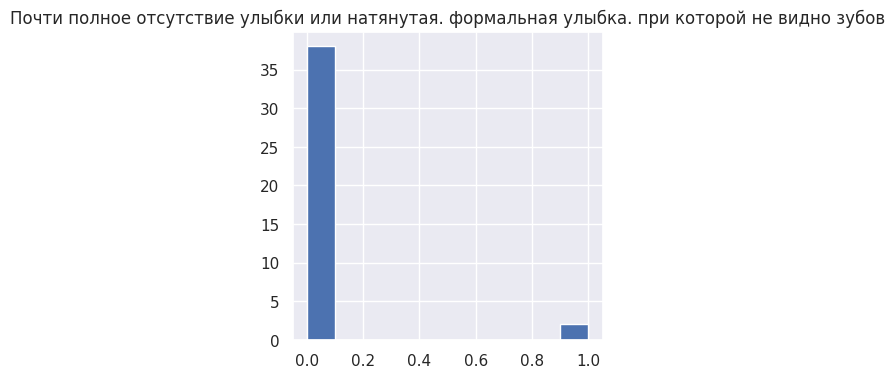

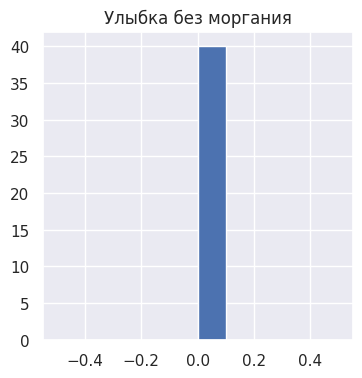

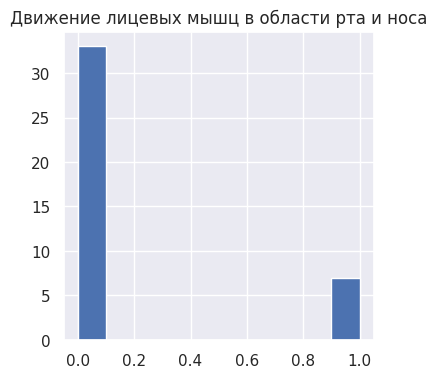

In [ ]:
import matplotlib.pyplot as plt


for column in data_unprep.columns:
    plt.figure()
    data_unprep[column].hist()
    plt.title(column)
    plt.show()


Притворное покашливание - равномерное.  
Смена позы - почти равномерное.  
Оттягивание воротничка - практически равномерное.
Взгляд в сторону с почесыванием шеи/затылка - практически равномерное.  
Использование открытых рук ладонями вверх - практически равномерное.  
Отсутствие улыбки/натянутая улыбка - равномерное.
Улыбка без моргания - равномерное.  
Прикрывание рта рукой - практически равномерное.  
  
Паузы хезитации - почти нормальное.  
Темп речи - почти нормальное.  


### Frames for dependence analysis

In [ ]:
X_prep.columns

Index(['Sex', 'Age', 'Кол-во деталей', 'Модальность "логичность"',
       'Кол-во речевых ошибок и оговорок', 'Лексика. описывающая динамику',
       'Дословные повторы', 'Вводные и незнаменательные слова',
       'Неопределённые местоимения', 'Экспрессивная лексика',
       'Темп речи (кол-во слогов/сек)', 'Паузы хезитации (кол-во/сек)', 'ЧОТ',
       'Избегание зрительного контакта или упорный взгляд', 'Смена позы',
       'Напряженное положение тела', 'Движение головой', 'Движение плечами',
       'Притворное покашливание', 'Потирание подбородка. щёк. бровей. волос',
       'Взгляд в сторону с почесыванием шеи. затылка',
       'Оттягивание воротничка одежды (для женщин потирание шеи)',
       'Прикрывание рта рукой', 'Жесты часто связаны с левой рукой',
       'Сокрытие ладоней', 'Медленное потирание ладоней одна о другую',
       'Жесты-иллюстрации', 'Жесты-манипуляции',
       'Использование открытых рук ладонями вверх в сочетании с приподнятыми плечами и локтями. плотно прижатым

In [ ]:
prep_uniform = ['Движение плечами', 'Притворное покашливание',
                'Почти полное отсутствие улыбки или натянутая. формальная улыбка. при которой не видно зубов',
                'Улыбка без моргания','Взгляд в сторону с почесыванием шеи. затылка',
                'Оттягивание воротничка одежды (для женщин потирание шеи)',
                'Прикрывание рта рукой',
                'Использование открытых рук ладонями вверх в сочетании с приподнятыми плечами и локтями. плотно прижатыми к телу',
                'Движение лицевых мышц в области рта и носа']
unprep_uniform = ['Притворное покашливание',
                'Почти полное отсутствие улыбки или натянутая. формальная улыбка. при которой не видно зубов',
                'Улыбка без моргания',
                'Оттягивание воротничка одежды (для женщин потирание шеи)',
                'Прикрывание рта рукой',
                'Взгляд в сторону с почесыванием шеи. затылка',
                'Использование открытых рук ладонями вверх в сочетании с приподнятыми плечами и локтями. плотно прижатыми к телу',
                'Смена позы']
prep_normal = ['Темп речи (кол-во слогов/сек)', 'Паузы хезитации (кол-во/сек)', 'Движение головой']
unprep_normal = ['Темп речи (кол-во слогов/сек)', 'Паузы хезитации (кол-во/сек)']


In [ ]:
X_prep.drop(prep_uniform, axis=1, inplace=True)
X_unprep.drop(unprep_uniform, axis=1, inplace=True)

In [ ]:
X_prep_normal = X_prep[prep_normal]
X_unprep_normal = X_unprep[unprep_normal]

In [ ]:
X_prep_not_normal = X_prep.drop(prep_normal, axis=1)
X_unprep_not_normal = X_unprep.drop(prep_normal, axis=1)

In [ ]:
X_prep_normal['log_Движение головой'] = np.log(X_prep_normal['Движение головой'])
X_prep_normal.drop(['Движение головой'], axis=1, inplace=True)

/tmp/ipython-input-3284356033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_prep_normal['log_Движение головой'] = np.log(X_prep_normal['Движение головой'])
/tmp/ipython-input-3284356033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_prep_normal.drop(['Движение головой'], axis=1, inplace=True)


### Dependence analysis

In [ ]:
# X_prep_normal
# X_prep_not_normal
# X_unprep_normal
# X_unprep_not_normal
# y_unprep
# y_prep

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr, mannwhitneyu, chi2_contingency, fisher_exact

def assess_association_v2(features, is_normal, target):
    """
    Оценивает связь между признаками и бинарной целевой переменной.

    Параметры:
    -----------
    features : pd.DataFrame
        DataFrame с признаками (каждый столбец — отдельный признак).
    is_normal : bool
        - True: для количественных признаков используется точечно‑бисериальная корреляция.
        - False: для бинарных признаков — хи‑квадрат/Фишер;
                  для количественных — тест Манна — Уитни.
    target : array-like (pd.Series, list, np.array)
        Бинарная целевая переменная (0 и 1). Должна быть той же длины, что и features.

    Возвращает:
    ------------
    list of tuples
        Список кортежей: (название признака, значение, метод)
        - значение:
            * коэффициент корреляции (если is_normal=True и признак количественный);
            * p‑value (если is_normal=False).
        - метод: строка, указывающая применённый тест.
    """
    target = np.asarray(target)
    if len(target) != len(features):
        raise ValueError("Длина target должна совпадать с числом строк в features.")

    results = []

    for col in features.columns:
        x = np.asarray(features[col])
        unique_vals = np.unique(x)

        if is_normal:
            # Точечно‑бисериальная корреляция (только для количественных/порядковых)
            # Проверяем, что признак не бинарный (иначе корреляция бессмысленна)
            if len(unique_vals) == 2:
                results.append((col, np.nan, 'point‑biserial (binary skipped)'))
                continue

            # должен быть else

            try:
                corr, p_value = pointbiserialr(x, target)
                results.append((col, p_value, 'point‑biserial'))
            except Exception as e:
                results.append((col, np.nan, f'point‑biserial (error: {e})'))

        else:
            # is_normal = False: выбираем тест по типу признака
            if len(unique_vals) == 2:
                # Бинарный признак: хи‑квадрат или точный тест Фишера
                try:
                    cross_tab = pd.crosstab(
                        pd.Series(x, name='feature'),
                        pd.Series(target, name='target')
                    )
                    chi2, p_chi2, dof, expected = chi2_contingency(cross_tab)
                    min_expected = expected.min()

                    if min_expected >= 5:
                        results.append((col, p_chi2, 'chi2'))
                    else:
                        oddsratio, p_fisher = fisher_exact(cross_tab)
                        results.append((col, p_fisher, 'fisher'))

                        group_0 = x[target == 0]
                        group_1 = x[target == 1]

                        if p_fisher < 0.05:
                          print(cross_tab)
                          print(oddsratio)

                except Exception as e:
                    results.append((col, np.nan, f'chi2/fisher (error: {e})'))
            else:
                # Количественный/порядковый признак: тест Манна — Уитни
                group_0 = x[target == 0]
                group_1 = x[target == 1]

                if len(group_0) < 2 or len(group_1) < 2:
                    results.append((col, np.nan, 'mann‑whitney (insufficient data)'))
                    continue

                try:
                    stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')
                    results.append((col, p_value, 'mann‑whitney'))

                    if p_value < 0.05:
                      print(col)
                      print(np.median(group_0))
                      print(np.median(group_1))
                except Exception as e:
                    results.append((col, np.nan, f'mann‑whitney (error: {e})'))


    return results



In [ ]:
assess_association_v2(X_prep_normal, True, y_prep)

[('Темп речи (кол-во слогов/сек)',
  np.float64(0.6620003111018073),
  'point‑biserial'),
 ('Паузы хезитации (кол-во/сек)',
  np.float64(0.9286877517707619),
  'point‑biserial'),
 ('log_Движение головой', np.float64(0.21564890135065262), 'point‑biserial')]

In [ ]:
assess_association_v2(X_unprep_normal, True, y_unprep)

[('Темп речи (кол-во слогов/сек)',
  np.float64(0.9498123003198614),
  'point‑biserial'),
 ('Паузы хезитации (кол-во/сек)',
  np.float64(0.8264349320047712),
  'point‑biserial')]

In [ ]:
assess_association_v2(X_prep_not_normal, False, y_prep)

Кол-во деталей
13.0
7.0
Кол-во речевых ошибок и оговорок
3.0
2.0
Лексика. описывающая динамику
15.0
7.5
Экспрессивная лексика
12.5
9.0


[('Sex', np.float64(1.0), 'chi2'),
 ('Age', np.float64(1.0), 'mann‑whitney'),
 ('Кол-во деталей', np.float64(0.00023918783697567786), 'mann‑whitney'),
 ('Модальность "логичность"', np.float64(0.1954260083661138), 'mann‑whitney'),
 ('Кол-во речевых ошибок и оговорок',
  np.float64(0.04011725913233203),
  'mann‑whitney'),
 ('Лексика. описывающая динамику',
  np.float64(0.0036837313867456563),
  'mann‑whitney'),
 ('Дословные повторы', np.float64(0.36278519556826727), 'mann‑whitney'),
 ('Вводные и незнаменательные слова',
  np.float64(0.8881676578248374),
  'mann‑whitney'),
 ('Неопределённые местоимения',
  np.float64(0.35536714981758855),
  'mann‑whitney'),
 ('Экспрессивная лексика', np.float64(0.012039582900569768), 'mann‑whitney'),
 ('ЧОТ', np.float64(0.8181243152019069), 'mann‑whitney'),
 ('Избегание зрительного контакта или упорный взгляд',
  np.float64(0.273321678292295),
  'chi2'),
 ('Смена позы', 1.0, 'fisher'),
 ('Напряженное положение тела', np.float64(0.10658316957488823), 'chi2

In [ ]:
assess_association_v2(X_unprep_not_normal, False, y_unprep)

target    0   1
feature        
0        20  15
1         0   5
inf
target    0   1
feature        
0        20  13
1         0   7
inf


[('Sex', np.float64(1.0), 'chi2'),
 ('Age', np.float64(1.0), 'mann‑whitney'),
 ('Кол-во деталей', np.float64(0.7750617666557598), 'mann‑whitney'),
 ('Модальность "логичность"', np.float64(0.7673797763586829), 'mann‑whitney'),
 ('Кол-во речевых ошибок и оговорок',
  np.float64(0.6261926848941939),
  'mann‑whitney'),
 ('Лексика. описывающая динамику',
  np.float64(0.13660808369720598),
  'mann‑whitney'),
 ('Дословные повторы', np.float64(0.3942104552357131), 'mann‑whitney'),
 ('Вводные и незнаменательные слова',
  np.float64(0.6423542052533626),
  'mann‑whitney'),
 ('Неопределённые местоимения',
  np.float64(0.8026644929354868),
  'mann‑whitney'),
 ('Экспрессивная лексика', np.float64(0.8058533331816671), 'mann‑whitney'),
 ('ЧОТ', np.float64(0.8075588254586762), 'mann‑whitney'),
 ('Избегание зрительного контакта или упорный взгляд',
  np.float64(0.04712404712404713),
  'fisher'),
 ('Напряженное положение тела',
  np.float64(0.25489085754716745),
  'mann‑whitney'),
 ('Движение плечами', n

### Unprepared prediction

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer, classification_report, balanced_accuracy_score, roc_auc_score
import seaborn as sns

def show_cls_metrics(y_trues, y_preds):
  print(classification_report(y_trues, y_preds))

  b_acc = balanced_accuracy_score(y_trues, y_preds)

  print("Balanced Accuracy: {0}".format(round(b_acc, 2)))
  cm = confusion_matrix(y_trues, y_preds, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
  disp.plot()
  plt.show()

#  Результаты классификации речевых фрагментов

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_unprep, y_unprep)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_preds = clf.predict(X_unprep)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.85      0.92        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40

Balanced Accuracy: 0.92


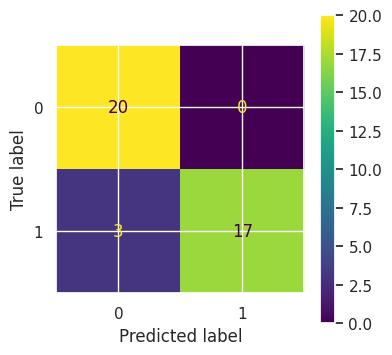

In [ ]:
sns.set(rc={'figure.figsize':(4, 4)})

show_cls_metrics(y_unprep, y_preds)

In [ ]:
pd.Series(clf.feature_importances_, X_unprep.columns).sort_values()

Медленное потирание ладоней одна о другую            0.000000
Нервное покачивание ногой                            0.000000
Сокрытие ладоней                                     0.000000
Потирание подбородка. щёк. бровей. волос             0.000951
Sex                                                  0.003115
Плотное сжатие губ                                   0.003338
Движение плечами                                     0.005820
Кол-во речевых ошибок и оговорок                     0.006213
Вводные и незнаменательные слова                     0.006634
Модальность "логичность"                             0.015335
Жесты часто связаны с левой рукой                    0.015534
Age                                                  0.017097
Напряженное положение тела                           0.029524
Жесты-иллюстрации                                    0.044557
Экспрессивная лексика                                0.044888
Темп речи (кол-во слогов/сек)                        0.045859
Паузы хезитации (кол-во/сек)                         0.048963
Движение головой                                     0.052448
Кол-во деталей                                       0.057096
Неопределённые местоимения                           0.058113
Жесты-манипуляции                                    0.061506
Дословные повторы                                    0.064043
ЧОТ                                                  0.084605
Лексика. описывающая динамику                        0.093023
Избегание зрительного контакта или упорный взгляд    0.105249
Движение лицевых мышц в области рта и носа           0.136091
dtype: float64

### Корреляция

In [ ]:
highest_gini_index = pd.Series(clf.feature_importances_, X_unprep.columns).sort_values()[31:].index

<Axes: >

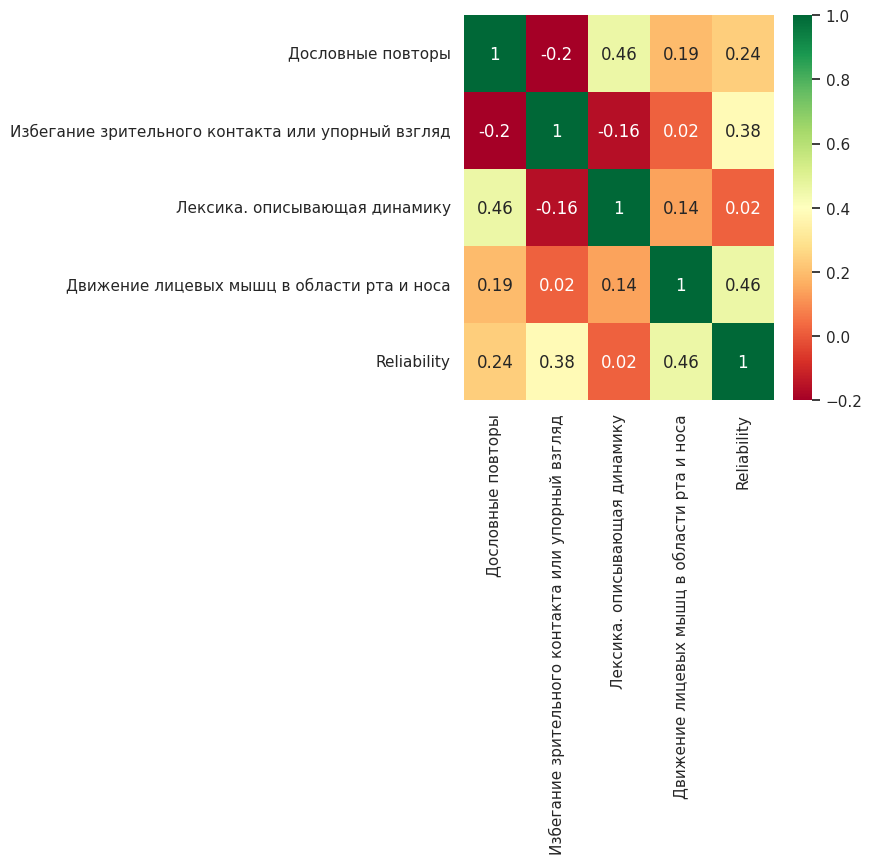

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(5, 5)})

sns.heatmap(X_unprep[highest_gini_index].join(y_unprep).corr().round(2),
            cmap ='RdYlGn', annot = True)

<Axes: >

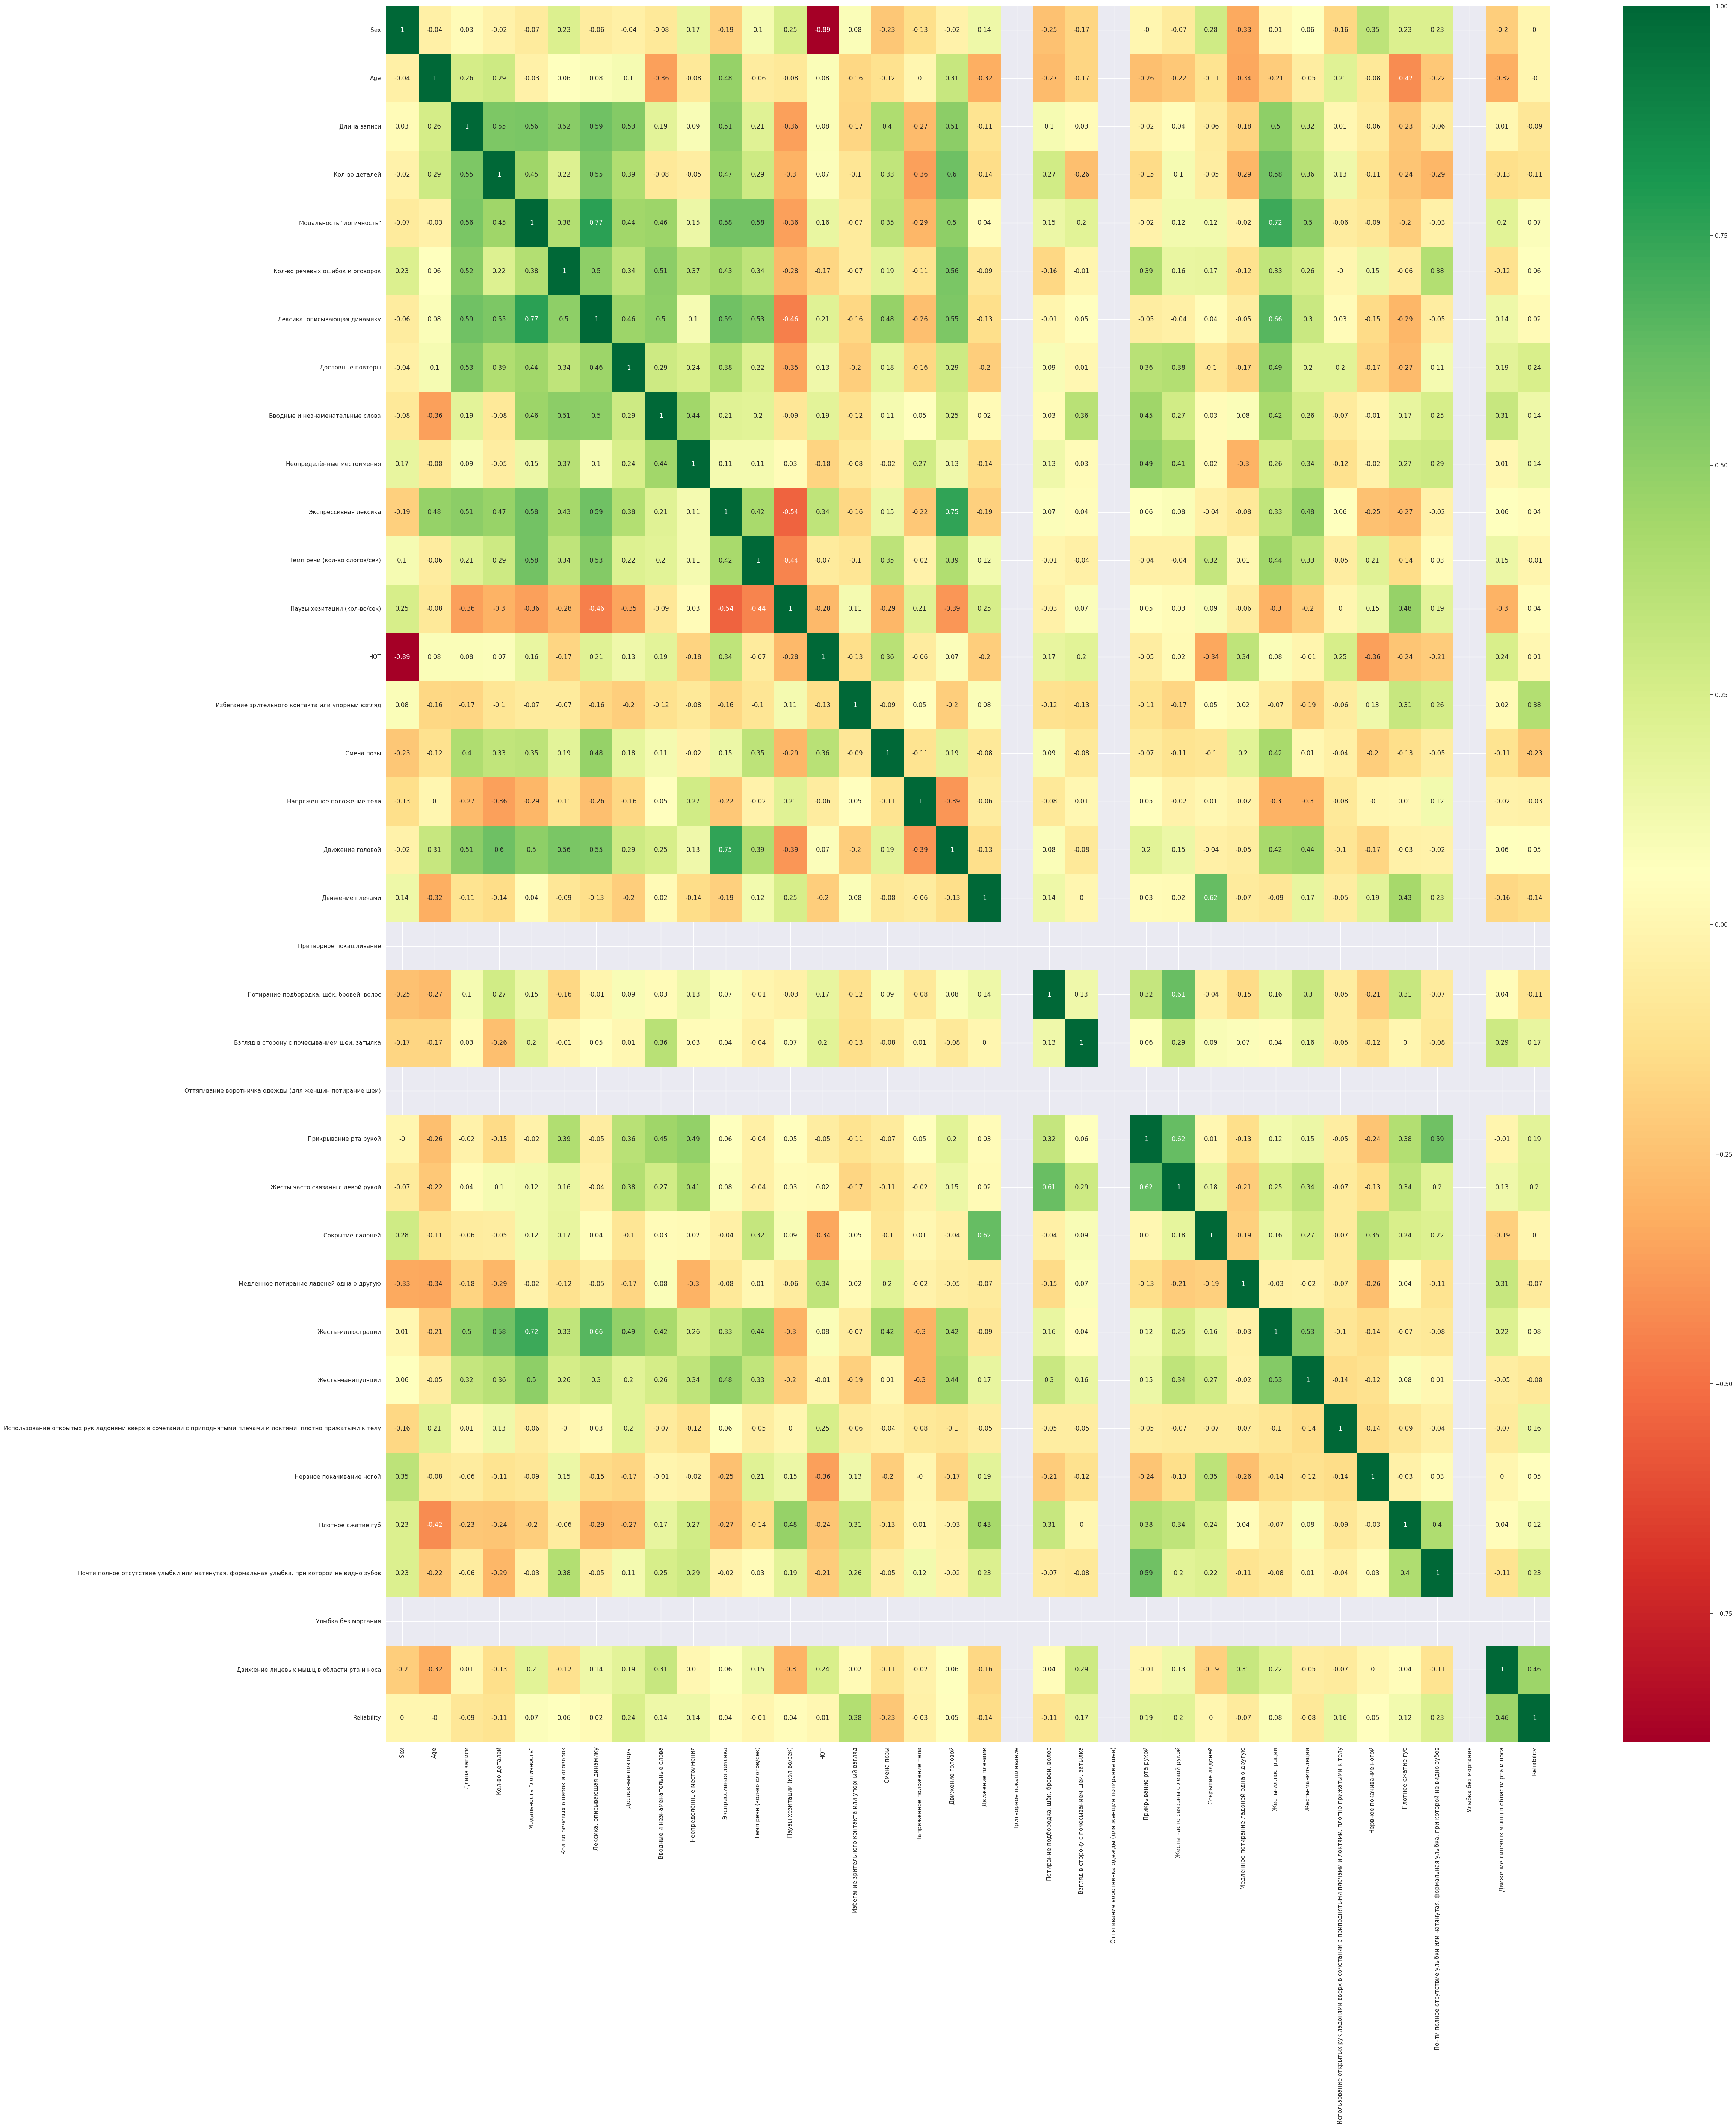

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(50, 60)})

sns.heatmap(X_unprep.join(y_unprep).corr().round(2),
            cmap ='RdYlGn', annot = True)

### Prepared prediction

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_prep, y_prep)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_preds = clf.predict(X_prep)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.95      0.90      0.92        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40

Balanced Accuracy: 0.92


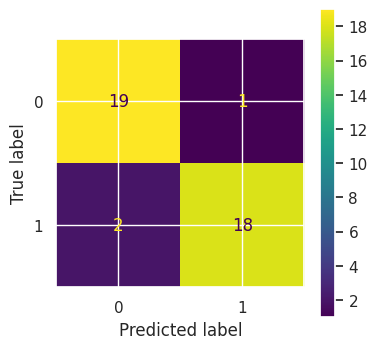

In [ ]:
show_cls_metrics(y_prep, y_preds)

In [ ]:
pd.Series(clf.feature_importances_, X_prep.columns).sort_values()

Медленное потирание ладоней одна о другую            0.000000
Жесты часто связаны с левой рукой                    0.001883
Смена позы                                           0.002333
Вводные и незнаменательные слова                     0.003691
Нервное покачивание ногой                            0.003778
Sex                                                  0.006640
Сокрытие ладоней                                     0.007858
Избегание зрительного контакта или упорный взгляд    0.016483
Дословные повторы                                    0.018894
Плотное сжатие губ                                   0.024853
ЧОТ                                                  0.025800
Age                                                  0.027472
Потирание подбородка. щёк. бровей. волос             0.028670
Паузы хезитации (кол-во/сек)                         0.029134
Жесты-манипуляции                                    0.029451
Напряженное положение тела                           0.037707
Жесты-иллюстрации                                    0.040423
Модальность "логичность"                             0.054041
Движение головой                                     0.058043
Темп речи (кол-во слогов/сек)                        0.064680
Кол-во речевых ошибок и оговорок                     0.066651
Неопределённые местоимения                           0.070021
Экспрессивная лексика                                0.077328
Лексика. описывающая динамику                        0.105088
Кол-во деталей                                       0.199076
dtype: float64

<Axes: >

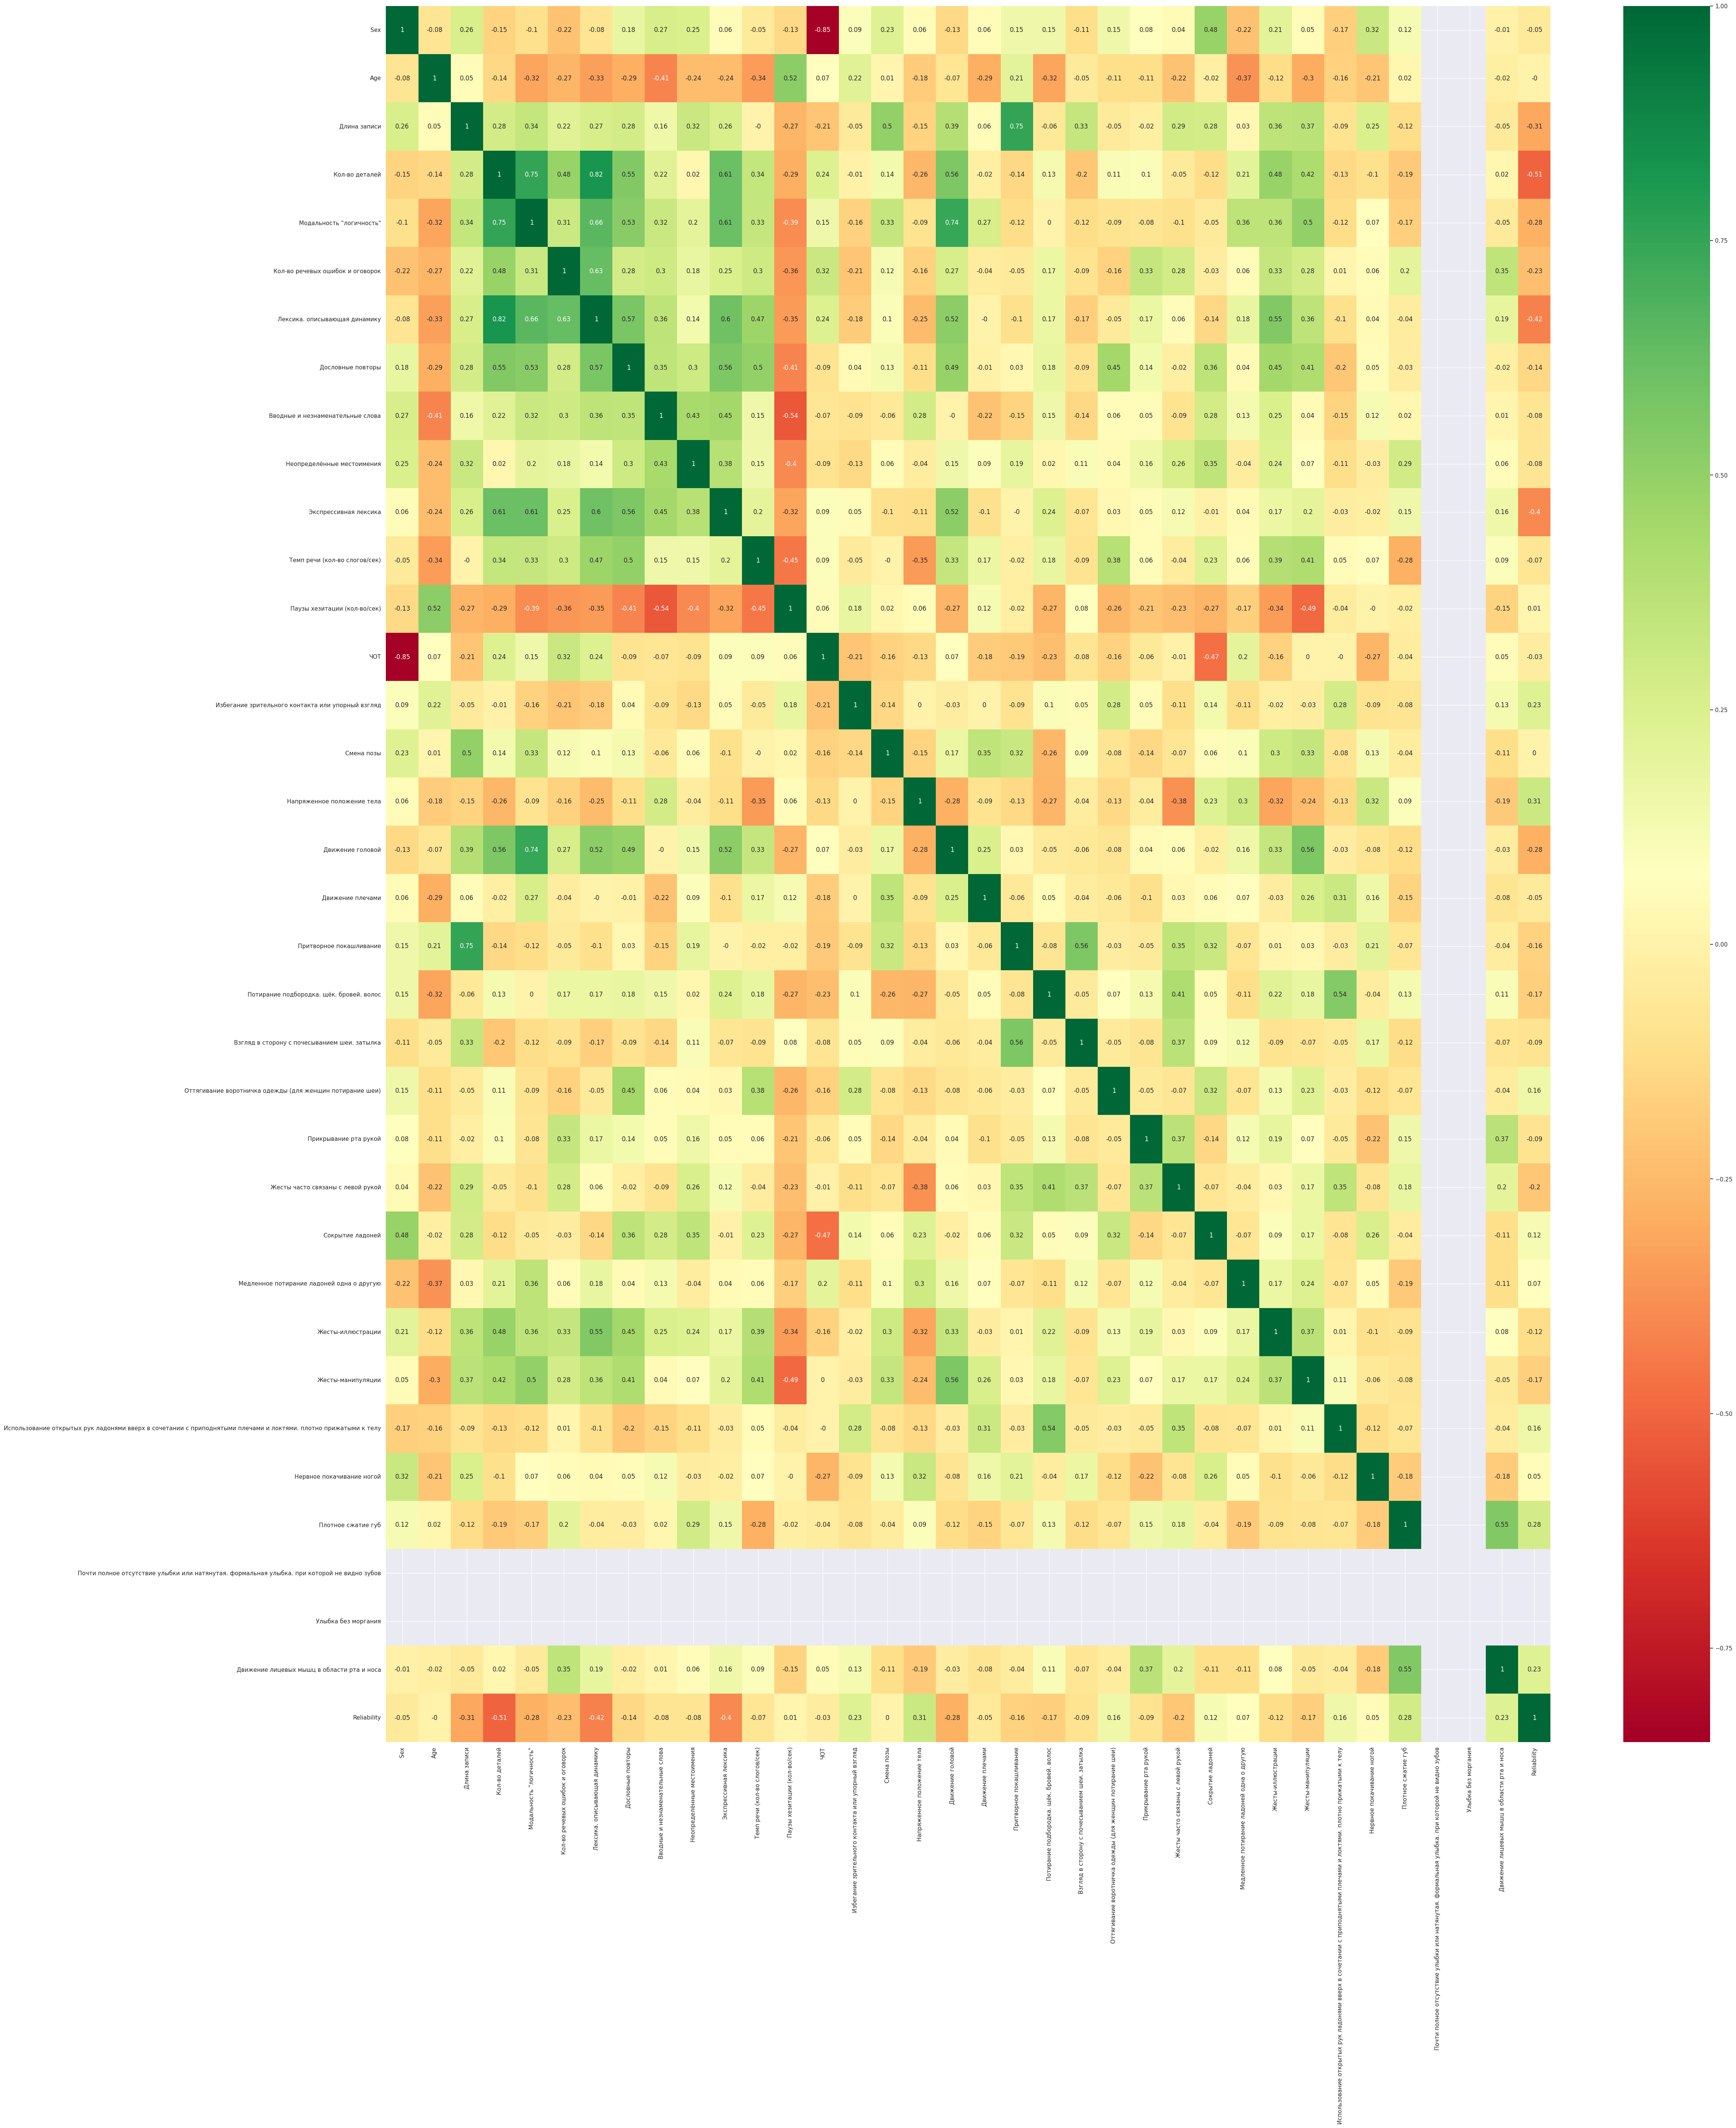

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(50, 60)})

sns.heatmap(X_prep.join(y_prep).corr().round(2),
            cmap ='RdYlGn', annot = True)